In [299]:
from subprocess import Popen, PIPE

def run_ampl(filepath: str) -> str:
    command = ["ampl", filepath]

    process = Popen(command, stdout=PIPE, cwd="..", text=True, encoding="UTF-8")
    (out_text, _) = process.communicate()
    exit_code = process.wait()

    if exit_code != 0:
        raise Exception(f"command '{' '.join(command)}' exited with code: {exit_code}")

    return out_text

In [300]:
z2_a_out_text = run_ampl("./src/z2-a.run")
print(z2_a_out_text)

:   out_risk out_average_profit    :=
0     0            -300
1     1             529.379
2     2            1208.76
3     3            1888.14
4     4            2567.52
5     5            3246.89
6     6            3926.27
7     7            4605.65
8     8            5285.03
9     9            5964.41
10   10            6575.36
11   11            7030.03
12   12            7416.61
13   13            7737.94
14   14            8030.47
15   15            8323.01
16   16            8614.74
17   17            8901.92
18   18            9189.1
19   19            9476.28
20   20            9763.47
21   21           10050.6
22   22           10337.8
23   23           10625
24   24           10912.2
25   25           11164.1
26   26           11408.5
27   27           11652.8
28   28           11897.1
29   29           12141.4
30   30           12385.7
31   31           12620.1
32   32           12823.2
33   33           13026.3
34   34           13206.1
35   35           13362.2
36   36   

In [301]:
from ampl import parse_ampl_table
from io import StringIO

z2_a_out = StringIO(z2_a_out_text)
z2_a_df = parse_ampl_table(z2_a_out)
z2_a_df.head()

,out_risk,out_average_profit
0,0.0,-300.0
1,1.0,529.379
2,2.0,1208.76
3,3.0,1888.14
4,4.0,2567.52


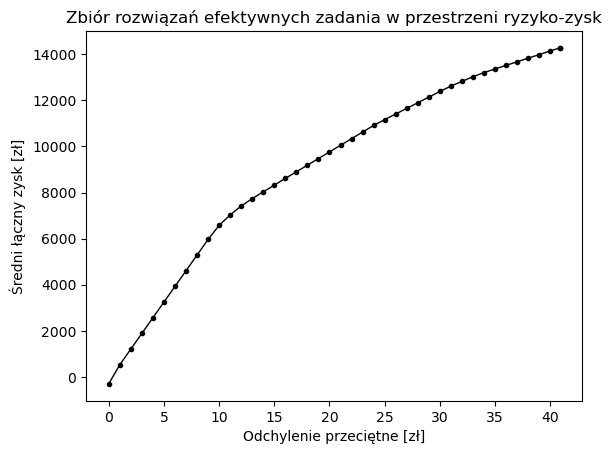

In [302]:
import numpy as np
from matplotlib import pyplot as plt


plt.plot(z2_a_df["out_risk"], z2_a_df["out_average_profit"], "ko-", linewidth=1, markersize=3)
plt.title("Zbiór rozwiązań efektywnych zadania w przestrzeni ryzyko-zysk")
plt.xlabel("Odchylenie przeciętne [zł]")
plt.ylabel("Średni łączny zysk [zł]")
plt.show()

In [303]:
z2_c_out_text = run_ampl("./src/z2-c.run")
print(z2_c_out_text)

set in_risks_max := 5 20 37;

:    profit  abs(risk[s])    :=
1    3476.7    11.4901
2    3227.33    0.978169
3    3049.23    9.88327
4    3261.14    0.712393
5    3246.89    0
6    3123.3     6.1795
7    3151.22    4.78368
8    3418.98    8.60409
9    3178.79    3.40518
10   3079.74    8.35751
11   3216.44    1.52283
12   3249.71    0.140858
13   3106.54    7.01775
14   3346.72    4.99111
15   3186.91    2.99905
16   3246.89    0
17   3246.89    0
18   3302.68    2.78935
19   3672.34   21.2721
20   3149.43    4.87306
;

:     profit  abs(risk[s])    :=
1    10478.6     35.7569
2     9998.88    11.7705
3     9216.14    27.3663
4     9630.32     6.65744
5    10000.5     11.8519
6     9091.59    33.5937
7     9189.46    28.7004
8    10202.8     21.9681
9     9011.29    37.6087
10    9489.2     13.7135
11    9815.97     2.62517
12   10154.9     19.5706
13    9535.17    11.415
14   10217.1     22.6794
15    9763.47     0
16    9418.08    17.2695
17    9763.47     0
18    9567.89     9.7790

In [304]:
from ampl import parse_ampl_set, parse_ampl_table

z2_c_out = StringIO(z2_c_out_text)
z2_c_risks_max = parse_ampl_set(z2_c_out)
display(z2_c_risks_max)

z2_c_dfs = [parse_ampl_table(z2_c_out, names={1: "risk"}) for _ in z2_c_risks_max]
display(z2_c_dfs[0].head())

0     5
1    20
2    37
Name: in_risks_max, dtype: int64

,profit,risk
1,3476.7,11.4901
2,3227.33,0.978169
3,3049.23,9.88327
4,3261.14,0.712393
5,3246.89,0.0


In [305]:
import pandas as pd

data = np.array([df["profit"] for df in z2_c_dfs])
data = np.sort(data, 1)
n_scenarios = data.shape[1]
headers = [f"{(i+1)/n_scenarios:.2f}" for i in range(n_scenarios)]
index = pd.Index(z2_c_risks_max, name="risk")
profits_sorted = pd.DataFrame(data, columns=headers, index=index)
profits_sorted


,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
risk,,,,,,,,,,,,,,,,,,,,
5,3049.23,3079.74,3106.54,3123.3,3149.43,3151.22,3178.79,3186.91,3216.44,3227.33,3246.89,3246.89,3246.89,3249.71,3261.14,3302.68,3346.72,3418.98,3476.7,3672.34
20,9011.29,9091.59,9189.46,9216.14,9418.08,9485.54,9489.2,9535.17,9567.89,9630.32,9763.47,9763.47,9815.97,9998.88,10000.5,10154.9,10202.8,10217.1,10478.6,11239.0
37,12380.9,12410.5,12739.0,12798.4,12830.2,12918.9,12987.7,13348.6,13499.0,13519.6,13583.7,13895.2,14056.8,14104.2,14105.7,14255.5,14461.5,14670.1,14718.4,16200.8


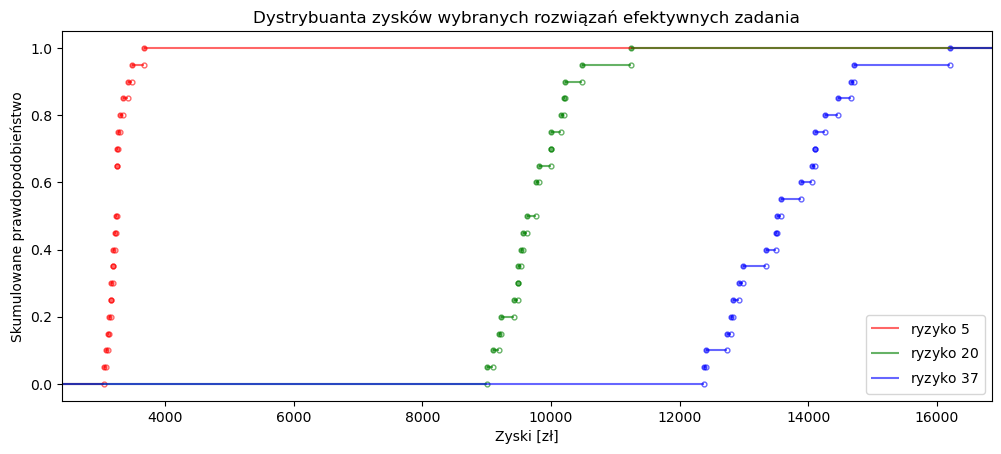

In [306]:
profit_max = profits_sorted.values[:, -1].max()
profit_min = profits_sorted.values[:, 0].min()
margin = (profit_max - profit_min) * 0.05
plt.figure(figsize=(12, 4.8))

for (risk, row), color in zip(profits_sorted.iterrows(), "rgb"):
    # lines
    xs = np.array([profit_min - margin, *row.values, profit_max + margin])
    ys = np.array(range(n_scenarios + 1)) / n_scenarios
    plt.hlines(ys, xs[:-1], xs[1:], color, label=f"ryzyko ${risk}$", alpha=0.6)

    # start points
    filter = [True] + [x1 != x2 for x1, x2 in zip(xs[1:-2], xs[2:-1])]
    style={"s": 12, "facecolors":"white", "edgecolors": color, "alpha": 0.6}
    plt.scatter(xs[1:-1][filter], ys[:-1][filter], **style)

    # end points
    filter = [x1 != x2 for x1, x2 in zip(xs[1:-2], xs[2:-1])] + [True]
    style={"s": 12, "c": color, "alpha": 0.6}
    plt.scatter(xs[1:-1][filter], ys[1:][filter], **style)

plt.title("Dystrybuanta zysków wybranych rozwiązań efektywnych zadania")
plt.xlabel("Zyski [zł]")
plt.ylabel("Skumulowane prawdopodobieństwo")
plt.legend(loc="lower right")
plt.xlim((profit_min - margin, profit_max + margin))
plt.show()